In [169]:
PATCH_LEN = 8
MAX_PATCHES = 1500
ICA_COMPONENTS = 30

In [170]:
from sklearn.decomposition import FastICA

In [171]:
path="./input/BSR/BSDS500/data/images/train/"

In [172]:
import cv2
import glob
import numpy as np
from sklearn.feature_extraction.image import extract_patches_2d

In [173]:
def load_overlapping_patches(path):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    image_patches = extract_patches_2d(image=image, patch_size=(PATCH_LEN, PATCH_LEN), max_patches=MAX_PATCHES)
    image_patches = image_patches.reshape(-1, PATCH_LEN * PATCH_LEN)

    return image_patches

In [174]:
images_path_list = glob.glob(f"{path}/*.jpg")

image_patches = []

for image_path in images_path_list:
    patches = load_overlapping_patches(image_path)
    image_patches.append(patches)

image_patches = np.vstack(image_patches)

In [175]:
#size of image_patches
image_patches.shape

(300000, 64)

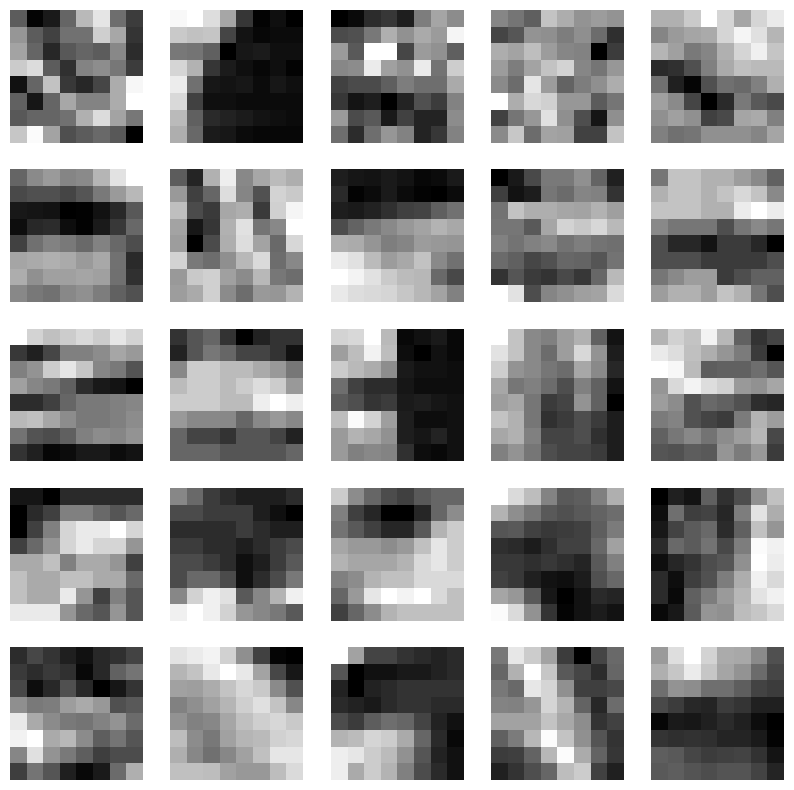

In [176]:
import matplotlib.pyplot as plt

#display the image patches
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image_patches[i].reshape(PATCH_LEN, PATCH_LEN), cmap="gray")
    plt.axis("off")
plt.show()

In [177]:
# image_pca = PCA(n_components=PCA_COMPONENTS)
image_ica = FastICA(n_components=ICA_COMPONENTS)
image_ica.fit(image_patches)

FastICA(n_components=30)

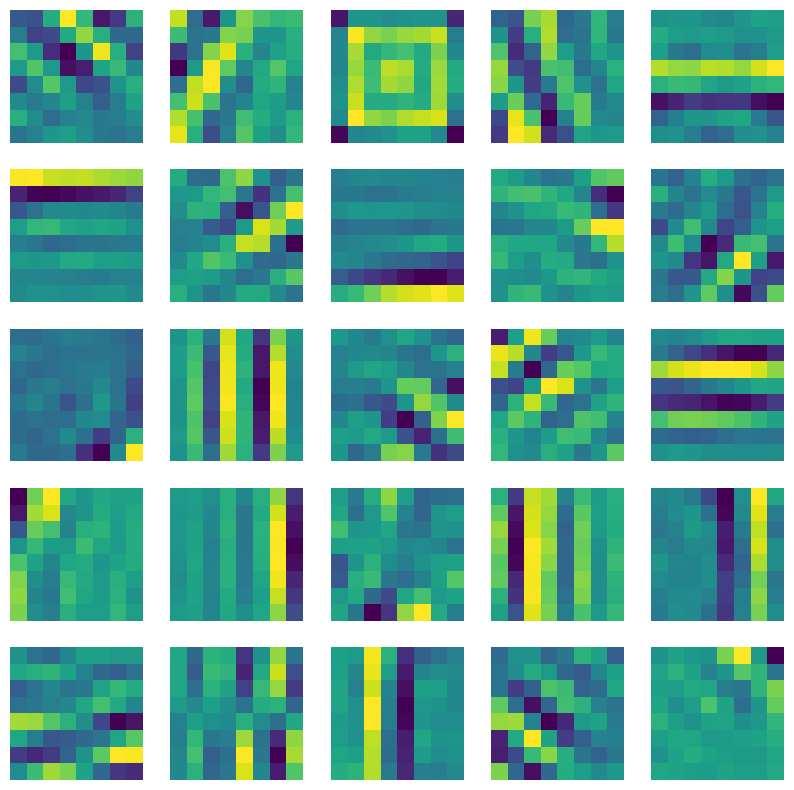

In [178]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image_ica.components_[i].reshape(PATCH_LEN, PATCH_LEN), )
    plt.axis("off")
plt.show()


In [179]:
ica_weights = []
ica_components = []
for ind, ica_component in enumerate(image_ica.components_, 1):
    image = ica_component.reshape(PATCH_LEN, PATCH_LEN)
    ica_weights.append(image)
    ica_components.append(np.var(ica_component))

In [180]:
import os
def plot_image_grid(images, num_images_per_row=5):
  
    component = 0
    num_rows = len(images) // num_images_per_row
    f, ax = plt.subplots(num_rows, num_images_per_row)

    for i in range(num_rows):
        for j in range(num_images_per_row):
            component += 1
            ax[i, j].imshow(images[i * num_images_per_row + j])
            ax[i, j].set_title(component)
            ax[i, j].axis("off")

        f.set_figheight(20)
        f.set_figwidth(20)

        #create the directory "./results/natural_image_ica/ if not exists
        if not os.path.exists("./results/natural_image_ica/"):
            os.makedirs("./results/natural_image_ica/")
        
    plt.savefig(f"./results/natural_image_ica/{MAX_PATCHES}.png")
    plt.show()

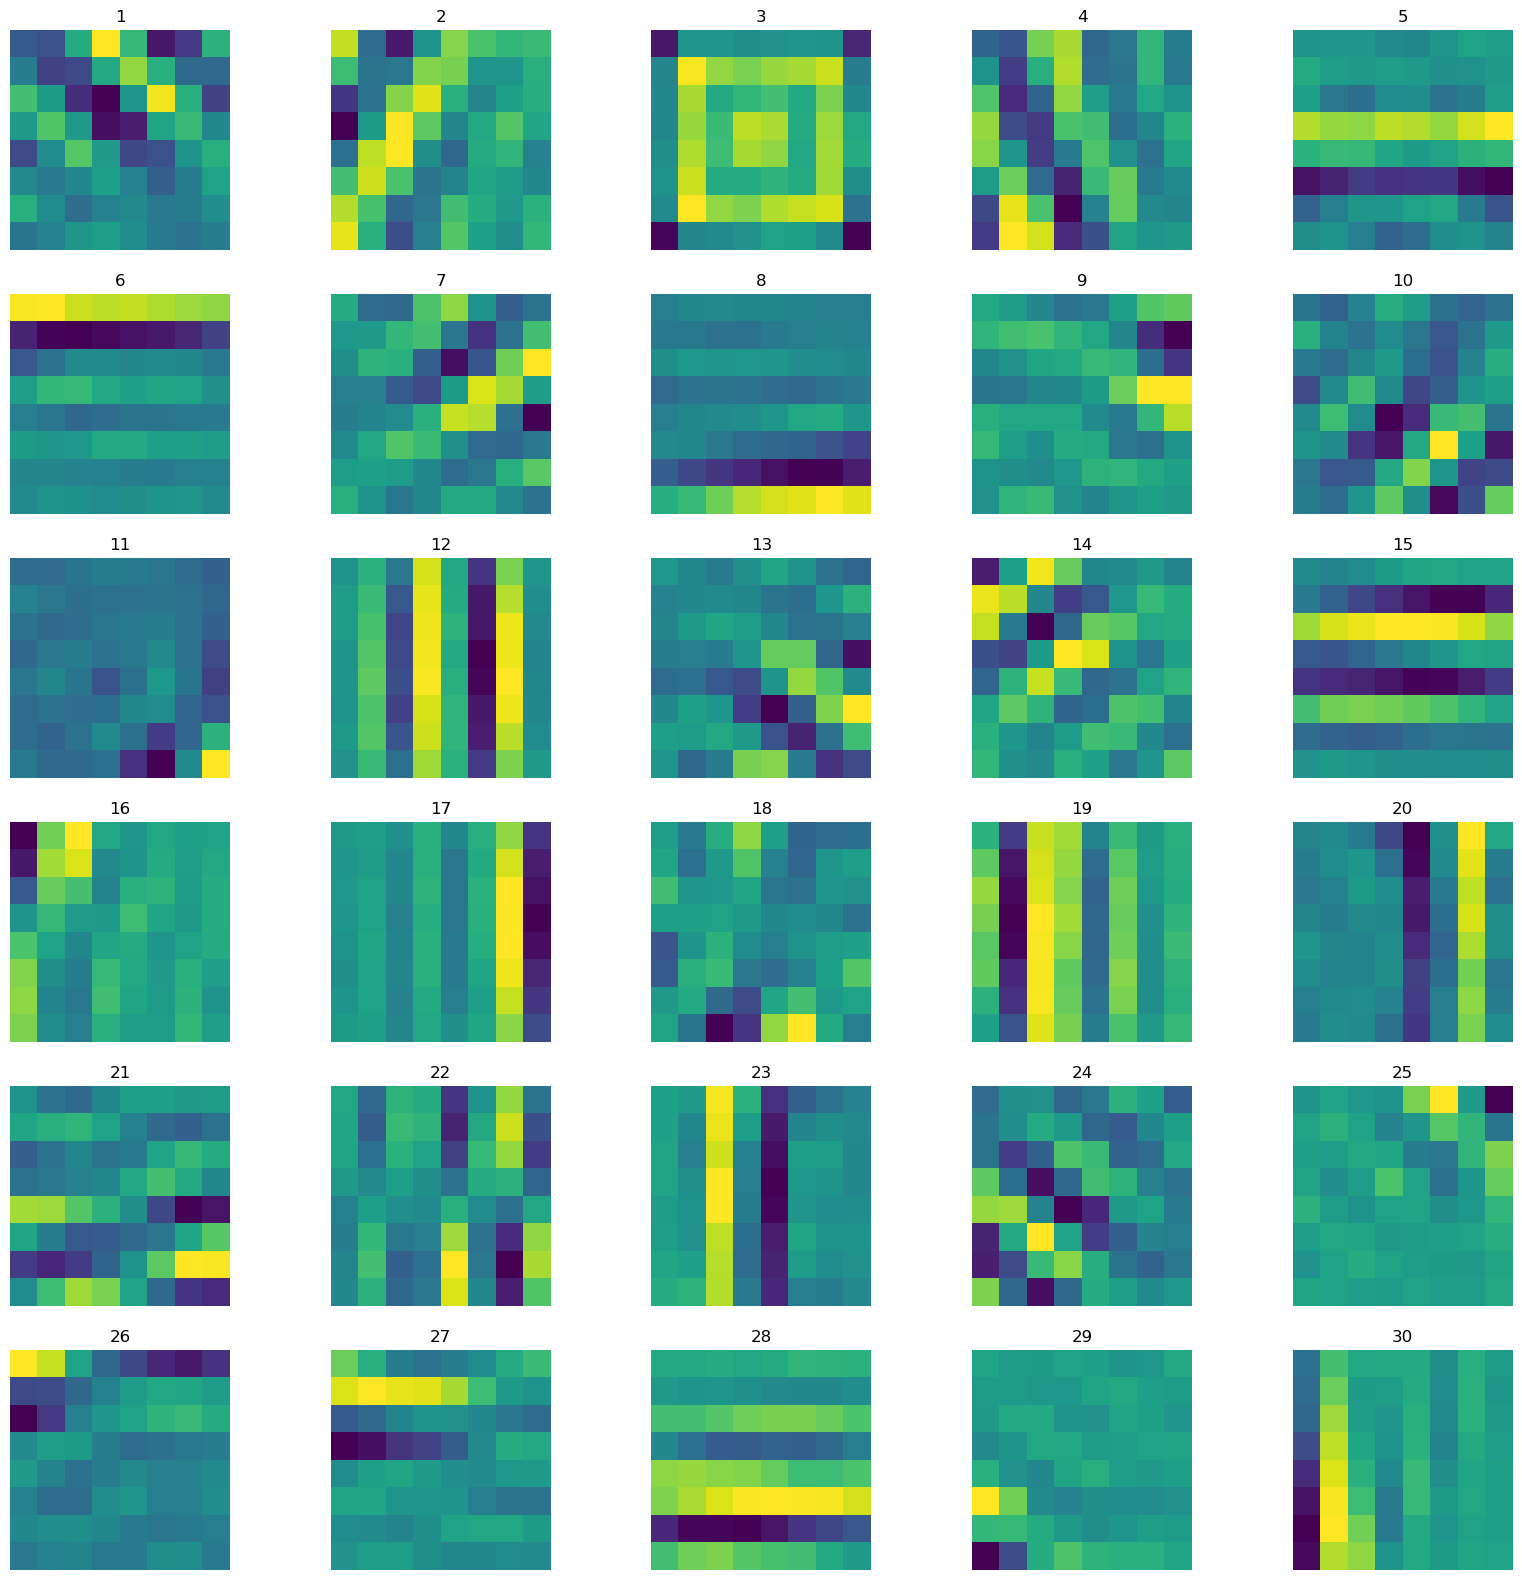

In [181]:
plot_image_grid(ica_weights)

In [182]:
#convert the list ica_components to numpy array
ica_components = np.array(ica_components)


In [183]:
#mutual information between the pixels of the image and the pixels of the image after applying the ICA  components
from sklearn.metrics import mutual_info_score

def mutual_information(image, image_ica):
    mutual_info = []
    for i in range(ICA_COMPONENTS):
        mutual_info.append(mutual_info_score(image, image_ica[i]))
    return mutual_info


In [184]:
#show the shape of the new transdormed image
image_ica_transformed = image_ica.transform(image_patches)
print(image_ica_transformed.shape)

(300000, 30)


In [185]:
#extract the 2 maximum indices of the ica_components
first, second = np.argsort(ica_components)[-1], np.argsort(ica_components)[-2]

transformed_data_x = image_ica.transform(image_patches)[:, first]
transformed_data_y = image_ica.transform(image_patches)[:, second]


In [186]:
#calculate the mutual information between transformed_data_x and transformed_data_y with bin size 10
#make 2d histogram of the transformed_data_x and transformed_data_y
hist, xedges, yedges = np.histogram2d(transformed_data_x, transformed_data_y, bins=10)

#calculate the mutual information between the transformed_data_x and transformed_data_y
mutual_info = mutual_info_score(None,None,contingency= hist)

#print the mutual information
print(mutual_info)

0.009689078152331406
